In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [13]:
def trapezoid_integration(x_dist,y_dist, definite=True):
    if definite:
        return np.diff(x_dist).dot((y_dist[:-1]+y_dist[1:])/2)
    else:
        return np.insert(np.cumsum(np.diff(x_dist)*((y_dist[:-1]+y_dist[1:])/2)), 0, 0)

In [60]:
p = np.linspace(0,1,1000)
prior = np.ones(1000)
# prior = scipy.stats.beta.pdf(p,30,70)
success_likelihood = np.linspace(0,1,1000)
failure_likelihood = 1-np.linspace(0,1,1000)
success_proportion = .55

priors = []
for i in range(1000):
    posterior_proportional = np.exp(np.log(prior) + 10*np.log((success_likelihood*success_proportion + failure_likelihood*(1-success_proportion))))
    prior = posterior_proportional/trapezoid_integration(p, posterior_proportional)
    priors.append(prior)

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/853885654.py:10: RuntimeWarning: divide by zero encountered in log
  posterior_proportional = np.exp(np.log(prior) + 10*np.log((success_likelihood*success_proportion + failure_likelihood*(1-success_proportion))))


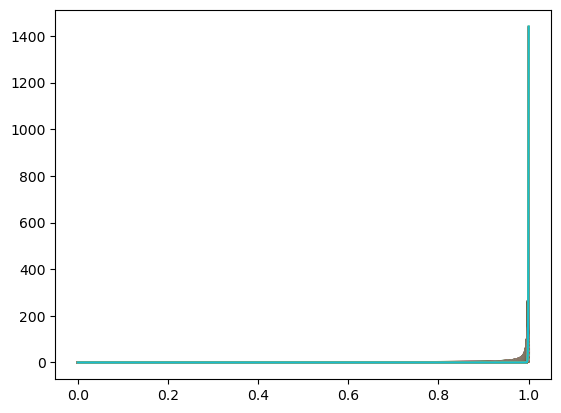

In [61]:
for prior in priors:
    plt.plot(p,prior)

0.49999999999999994


/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/2800489173.py:36: RuntimeWarning: invalid value encountered in subtract
  divergences.append(trapezoid_integration(p,np.nan_to_num(-target_distribution*(log_prior-log_target))))


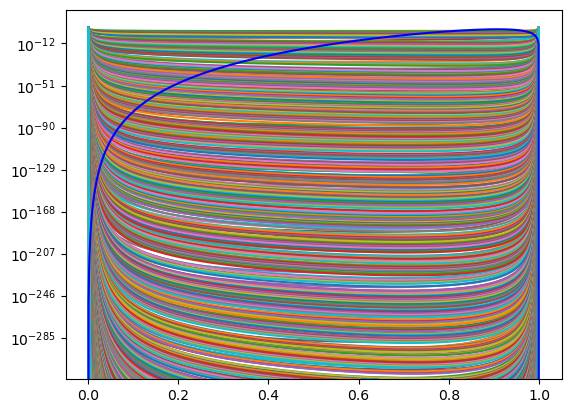

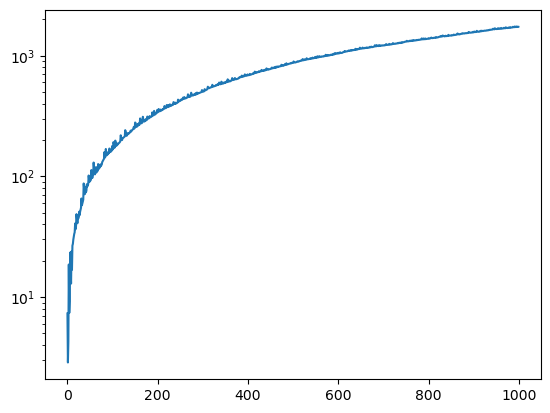

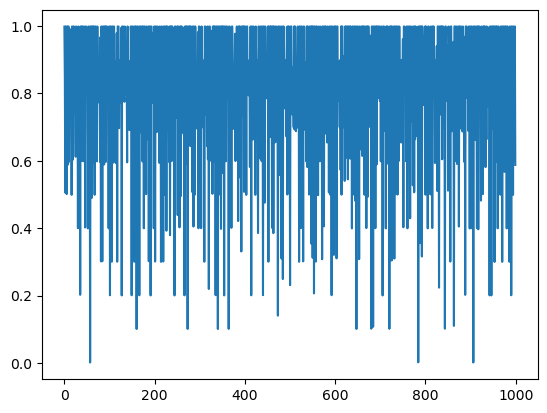

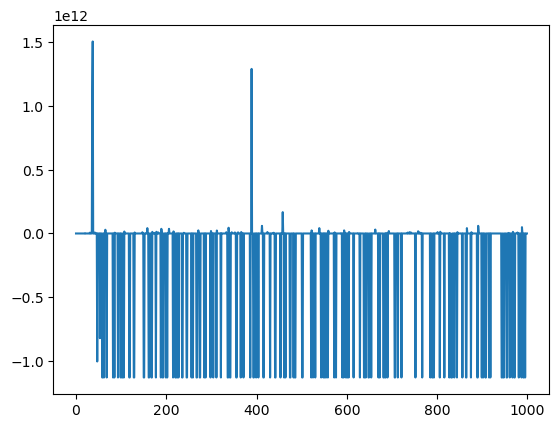

In [272]:
batch_size=10
observations_per_sample = 10
num_batches = 1000
iterations_per_batch = 1
target_alpha, target_beta = 90,10

resolution = 1000
p = np.linspace(0,1,resolution)
prior = np.ones(resolution)
mean = trapezoid_integration(p, p*prior)
print(mean)
log_prior = np.log(prior)
target_distribution = scipy.stats.beta.pdf(p,target_alpha,target_beta)
log_target = scipy.stats.beta.logpdf(p,target_alpha,target_beta)
divergences = []
means = []
evidences = []
for i in range(num_batches):
    ps = scipy.stats.beta.rvs(target_alpha,target_beta, size=batch_size)
    counts = np.array(scipy.stats.binom.rvs(observations_per_sample,ps))
    log_likelihoods = scipy.stats.binom.logpmf(counts[...,np.newaxis],observations_per_sample,p)
    for j in range(iterations_per_batch):
        # step_modification = observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))
        # step_modification[step_modification == float('-inf')] = float('inf')
        # log_posterior_proportional = log_prior + log_likelihoods - step_modification
        log_pmfs = scipy.stats.binom.logpmf(np.arange(observations_per_sample+1)[...,np.newaxis],observations_per_sample,p)
        pmfs = scipy.stats.binom.pmf(np.arange(observations_per_sample+1),observations_per_sample,mean)
        step_modification = log_pmfs.transpose().dot(pmfs)
        step_modification[step_modification == float('-inf')] = float('inf')
        
        log_posterior_proportional = log_prior + log_likelihoods - step_modification

        log_posteriors = log_posterior_proportional.transpose() - np.log(trapezoid_integration(p, np.exp(log_posterior_proportional).transpose()))
        log_prior = scipy.special.logsumexp(log_posteriors.reshape(-1,batch_size),axis=1) - np.log(batch_size)
    try:
        divergences.append(trapezoid_integration(p,np.nan_to_num(-target_distribution*(log_prior-log_target))))
    except:
        print(log_prior)
        print(log_target)
        print(i)
    mean = trapezoid_integration(p,p*np.exp(log_prior))
    second_moment = trapezoid_integration(p,p**2*np.exp(log_prior))
    means.append(mean)
    evidences.append(mean*(1-mean)/(second_moment-mean**2)-1)
    plt.plot(p, np.exp(log_prior))
plt.plot(p, target_distribution, color='b')
plt.yscale('log')
plt.show()
plt.plot(divergences)
plt.yscale('log')
plt.show()
plt.plot(means)
plt.show()
plt.plot(evidences)

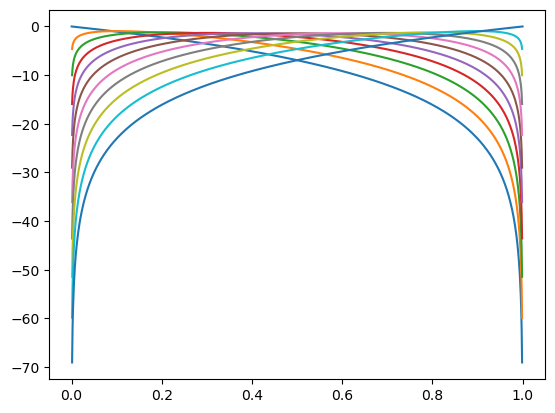

In [257]:
log_likelihoods = scipy.stats.binom.logpmf(np.arange(observations_per_sample+1)[...,np.newaxis],observations_per_sample,p)
plt.plot(p,log_likelihoods.transpose())

In [263]:
log_pmfs = scipy.stats.binom.logpmf(np.arange(observations_per_sample+1)[...,np.newaxis],observations_per_sample,p)
pmfs = scipy.stats.binom.pmf(np.arange(observations_per_sample+1),observations_per_sample,mean)
log_pmfs.transpose().dot(pmfs)

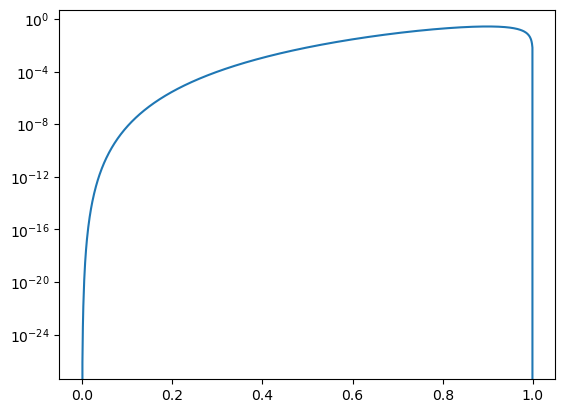

In [267]:
plt.plot(p,np.exp(log_pmfs.transpose().dot(pmfs)))
plt.yscale('log')

In [261]:
mean

0.8994201159768043

In [241]:
mean = .5
step_modification = observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))
step_modification[step_modification == float('-inf')] = float('inf')
step_modification

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/773805993.py:2: RuntimeWarning: divide by zero encountered in log
  step_modification = observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))


array([        inf, -3.45387814, -3.1078058 , -2.90557501, -2.76223623,
       -2.65116722, -2.56050971, -2.48393815, -2.41767674, -2.35929002,
       -2.30711507, -2.25996579, -2.21696643, -2.17745192, -2.14090529,
       -2.10691673, -2.07515586, -2.04535245, -2.01728267, -1.990759  ,
       -1.96562282, -1.94173872, -1.91899023, -1.89727638, -1.87650913,
       -1.85661121, -1.83751447, -1.81915844, -1.80148929, -1.78445883,
       -1.76802378, -1.75214513, -1.73678758, -1.72191908, -1.70751047,
       -1.6935351 , -1.6799686 , -1.6667886 , -1.65397449, -1.64150731,
       -1.62936951, -1.61754486, -1.60601827, -1.59477576, -1.58380429,
       -1.5730917 , -1.56262663, -1.55239846, -1.54239724, -1.53261364,
       -1.52303888, -1.51366471, -1.50448337, -1.49548754, -1.48667029,
       -1.4780251 , -1.46954579, -1.46122651, -1.4530617 , -1.44504612,
       -1.43717476, -1.42944287, -1.42184595, -1.41437968, -1.40703997,
       -1.39982292, -1.39272481, -1.38574206, -1.37887129, -1.37

In [233]:
log_posterior_proportional

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [231]:
trapezoid_integration(p,p*np.exp(log_prior))

nan

In [232]:
log_prior

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [223]:
observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/3860494.py:1: RuntimeWarning: divide by zero encountered in log
  observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [225]:
trapezoid_integration(p, prior)

1.0

In [221]:
(1-mean)*np.log(p)

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/384576286.py:1: RuntimeWarning: divide by zero encountered in log
  (1-mean)*np.log(p)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [216]:
observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/3860494.py:1: RuntimeWarning: divide by zero encountered in log
  observations_per_sample*(mean*np.log(p)+(1-mean)*np.log(1-p))


array([       -inf, -6.27958557, -5.64947993, -5.28092963, -5.0194656 ,
       -4.81667891, -4.65100691, -4.51094744, -4.38963475, -4.28264027,
       -4.1869402 , -4.10037781, -4.02136064, -3.94867934, -3.88139388,
       -3.81875908, -3.76017418, -3.70514783, -3.65327298, -3.60420868,
       -3.55766647, -3.51340017, -3.47119793, -3.43087621, -3.39227489,
       -3.35525348, -3.31968801, -3.28546859, -3.25249728, -3.22068647,
       -3.18995748, -3.16023935, -3.13146788, -3.10358482, -3.07653712,
       -3.05027634, -3.02475816, -2.99994187, -2.97579005, -2.95226816,
       -2.92934433, -2.90698901, -2.88517481, -2.86387626, -2.84306966,
       -2.8227329 , -2.80284533, -2.78338763, -2.7643417 , -2.74569057,
       -2.72741829, -2.70950986, -2.69195114, -2.67472882, -2.65783033,
       -2.64124379, -2.62495795, -2.60896218, -2.59324639, -2.57780101,
       -2.56261695, -2.54768558, -2.53299869, -2.51854845, -2.50432741,
       -2.49032847, -2.47654486, -2.46297009, -2.44959798, -2.43

In [198]:
np.array(scipy.stats.binom.rvs(observations_per_sample,ps))

array(1)

In [195]:
scipy.stats.beta.rvs(target_alpha,target_beta, size=batch_size)

array([0.8968773])

In [142]:
log_posteriors.shape

(1000, 100)

In [117]:
trapezoid_integration(p,np.nan_to_num(-target_distribution*(np.log(prior)-np.log(target_distribution))))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/1775456877.py:1: RuntimeWarning: divide by zero encountered in log
  trapezoid_integration(p,np.nan_to_num(-target_distribution*(np.log(prior)-np.log(target_distribution))))
/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/1775456877.py:1: RuntimeWarning: invalid value encountered in subtract
  trapezoid_integration(p,np.nan_to_num(-target_distribution*(np.log(prior)-np.log(target_distribution))))


0.20191695543245727

In [118]:
np.nan_to_num(-target_distribution*(np.log(prior)-np.log(target_distribution)))

/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/134815068.py:1: RuntimeWarning: divide by zero encountered in log
  np.nan_to_num(-target_distribution*(np.log(prior)-np.log(target_distribution)))
/var/folders/y3/v5bw1qds23152m_g_1tzz7q80000gn/T/ipykernel_64281/134815068.py:1: RuntimeWarning: invalid value encountered in subtract
  np.nan_to_num(-target_distribution*(np.log(prior)-np.log(target_distribution)))


array([ 0.00000000e+000, -5.71677019e-115, -2.65367431e-100,
       -9.77095515e-092, -1.14554426e-085, -5.75625689e-081,
       -3.94597287e-077, -6.84293561e-074, -4.33981131e-071,
       -1.27665587e-068, -2.04895512e-066, -2.01425009e-064,
       -1.32107873e-062, -6.16821433e-061, -2.15630229e-059,
       -5.87411031e-058, -1.28781348e-056, -2.33286424e-055,
       -3.56889276e-054, -4.69599094e-053, -5.39746070e-052,
       -5.49103962e-051, -5.00098843e-050, -4.11782772e-049,
       -3.09186226e-048, -2.13296310e-047, -1.36095616e-046,
       -8.07907841e-046, -4.48555593e-045, -2.34016876e-044,
       -1.15209057e-043, -5.37262274e-043, -2.38144560e-042,
       -1.00648162e-041, -4.06739746e-041, -1.57579687e-040,
       -5.86662935e-040, -2.10343416e-039, -7.27766879e-039,
       -2.43434454e-038, -7.88570349e-038, -2.47773413e-037,
       -7.56244684e-037, -2.24520402e-036, -6.49212262e-036,
       -1.83049865e-035, -5.03830367e-035, -1.35512982e-034,
       -3.56516885e-034,

In [86]:
normalized_likelihoods = likelihoods/trapezoid_integration(p, likelihoods.transpose())[...,np.newaxis]

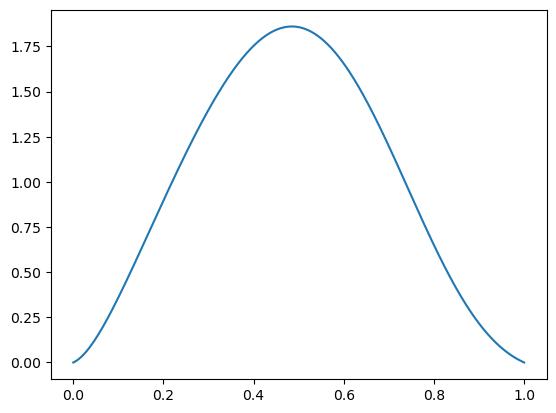

In [89]:
plt.plot(p,normalized_likelihoods.mean(axis=0))